In [1]:
from parameters import parameters
import numpy as np
import pandas as pd
import Utils
#
# LOOK HERE! 
# This cell must run first to setup the working environment
#

#load the config file
Utils.load_config('config.json')
Utils.print_parameters()

Below are the parameters in use. Check the parameters carefully to ensure a sucussful run.
{ 'agegrid_url': 'https://www.earthbyte.org/webdav/ftp/Data_Collections/Muller_etal_2016_AREPS/Muller_etal_2016_AREPS_Agegrids/Muller_etal_2016_AREPS_Agegrids_v1.17/Muller_etal_2016_AREPS_v1.17_netCDF/Muller_etal_2016_AREPS_v1.17_AgeGrid-{}.nc',
  'anchor_plate_id': 0,
  'case_name': 'case_AREPS',
  'coastlines': '../data/Global_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpmlz',
  'convergence_data_dir': './convergence_data/AREPS/',
  'convergence_data_filename_ext': 'csv',
  'convergence_data_filename_prefix': 'subStats',
  'coreg_input_dir': './coreg_input/AREPS/',
  'coreg_input_files': [ 'deposit_candidates.csv',
                         'negative_deposits.csv',
                         'positive_deposits.csv'],
  'coreg_output_dir': 'coreg_output',
  'feature_names': [ 'conv_rate',
                     'dist_nearest_edge',
                     'subduction_volume_km3y',
                     'car

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import pandas as pd
from parameters import parameters 
import Utils as Utils

names = ["Linear SVM",
         "SVC-POLY",
         #"SVC-POLY-C=100",
         "SVC-RBF",
         #"SVC-RBF-C=100",
         "SVC-SIGM",
         #"SVC-SIGM-C=100",
        #"GaussianProcess-1",
         "GaussianProcess",
         "Decision Tree",
         "RandomForest",
         #"NN-1e-05",
         "Neural_Network",
         "Naive Bayes",
         "QDA",
         "AdaBoost"
         #"AdaBoost-100"
]

classifiers = [
    #KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(kernel='poly', degree=3, gamma=2, C=10, probability=True),
    #SVC(kernel='poly', degree=3, gamma=2, C=100, probability=True),
    SVC(kernel='rbf', gamma=2, C=10, probability=True),
    #SVC(kernel='rbf', gamma=2, C=100, probability=True),
    SVC(kernel='sigmoid', gamma=2, C=10, probability=True),
    #SVC(kernel='sigmoid', gamma=2, C=100, probability=True),
#    GaussianProcessClassifier(1.0 * RBF(1.0)),
#    GaussianProcessClassifier(2.0 * RBF(1.0)),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1e-05, max_iter=1000),
    MLPClassifier(alpha=0.1, max_iter=1000),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    AdaBoostClassifier(n_estimators=10)
    #AdaBoostClassifier(n_estimators=100)
]



SA_positive = pd.read_csv(Utils.get_ml_input_dir() + 'SA_positive_deposits.csv')
SA_negative = pd.read_csv(Utils.get_ml_input_dir() + 'SA_negative_deposits.csv')

SA_train_test_data = pd.concat([SA_positive, SA_negative])

SA_labels = SA_train_test_data.iloc[:,-1]
SA_data = SA_train_test_data.iloc[:,:-1]

SA_data = preprocessing.scale(SA_data)

In [3]:
rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=None)
#rs = KFold(n_splits=10, shuffle=True, random_state=1)

SA_all_scores_cv = []
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, SA_data, SA_labels, cv=rs)
    score_list = scores.tolist()
    SA_all_scores_cv.append(name)
    SA_all_scores_cv.append(score_list)
    print(name)
    print(f"Score Mean: {round(np.mean(scores), 2)}, Score Standard Deviation: {round(np.std(scores),4)}")
    print(' ')

np.savetxt('case_AREPS/ml_output/SA_cv_scores_ShuffleSplit_10_20.csv', SA_all_scores_cv, fmt='%s\n', delimiter=",")

print('done!')

Linear SVM
Score Mean: 0.83, Score Standard Deviation: 0.0411
 
SVC-POLY
Score Mean: 0.95, Score Standard Deviation: 0.0219
 
SVC-RBF
Score Mean: 0.97, Score Standard Deviation: 0.0275
 
SVC-SIGM
Score Mean: 0.63, Score Standard Deviation: 0.0686
 
GaussianProcess
Score Mean: 0.96, Score Standard Deviation: 0.0211
 
Decision Tree
Score Mean: 0.96, Score Standard Deviation: 0.0268
 
RandomForest
Score Mean: 0.96, Score Standard Deviation: 0.0293
 
Neural_Network
Score Mean: 0.97, Score Standard Deviation: 0.0258
 
Naive Bayes
Score Mean: 0.81, Score Standard Deviation: 0.0542
 
QDA
Score Mean: 0.93, Score Standard Deviation: 0.0444
 
AdaBoost
Score Mean: 0.98, Score Standard Deviation: 0.0121
 
done!


Linear SVM


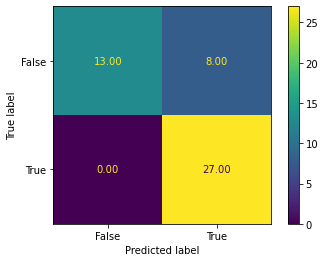

 
SVC-POLY


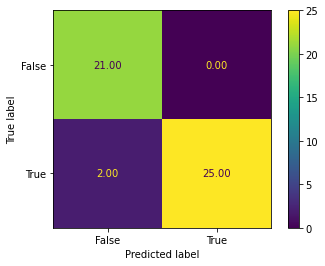

 
SVC-RBF


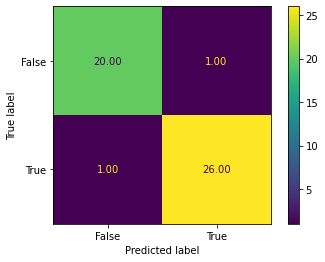

 
SVC-SIGM


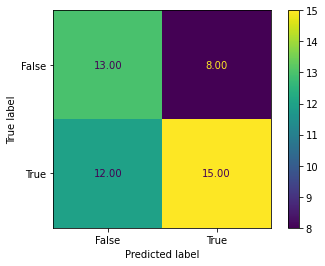

 
GaussianProcess


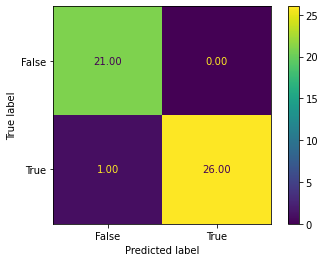

 
Decision Tree


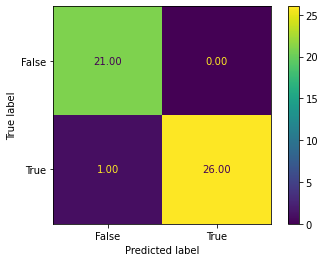

 
RandomForest


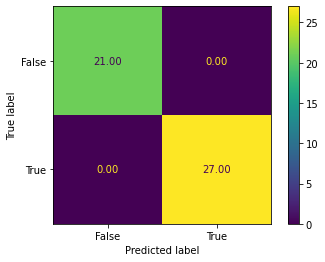

 
Neural_Network


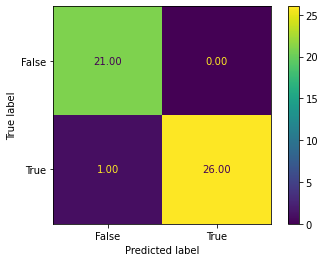

 
Naive Bayes


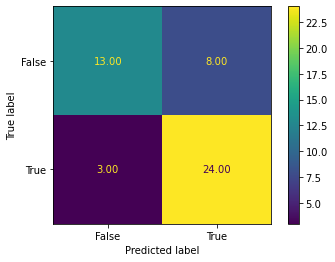

 
QDA


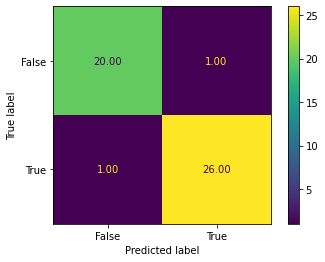

 
AdaBoost


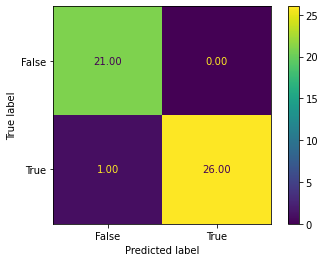

In [4]:


train_data, test_data, train_labels, test_labels = train_test_split(SA_data, SA_labels, test_size=0.25, random_state=42)

for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(train_data, train_labels)
    score=clf.score(test_data, test_labels)
    plot_confusion_matrix(clf, test_data, test_labels,values_format='.2f')
    plt.show()
    print(' ')

In [5]:


all_weights = []

all_weights.append(SA_train_test_data.columns[:-1])

for n in range(1, 31):
    
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

    clf.fit(train_data, train_labels)
    

#    print('For Random Forest model, the bar chart shows the weight of each feature in decision making.')
#    print(clf.feature_importances_)
    scores = clf.feature_importances_
    score_list = scores.tolist()
    
    all_weights.append(n)
    all_weights.append(score_list)
    
#     #plot the feature importance if using Random Forest Classifier. 
#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
#     ax.set_xlabel('Importance', fontsize=18)
#     ax.set_title('Feature Importance',fontsize=18)
#     ax.set_yticks(np.arange(len(clf.feature_importances_)))
#     #feature_names = ['Seafloor Age', 'Distance Along Trench', 'Trench Absolute Orthogonal',
#     #                'Convergence Orthogonal Velocity', 'Convergence Parallel Velocity']
#     feature_names = SA_train_test_data.columns[:-1]
#     print(feature_names)
#     ax.set_yticklabels(feature_names, rotation=0, fontsize=18)
#     ax.invert_yaxis() 
#     plt.show()

np.savetxt('case_AREPS/ml_output/SA_RF_features_importances.csv', all_weights, fmt='%s\n', delimiter=",")

print('done!')

done!
